<a href="https://colab.research.google.com/github/ryann-arruda/deep_learning_algorithms/blob/main/perceptron/pytorch_implementation/problems/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch.utils.data import random_split, DataLoader
import torch.nn.functional as F
from collections import Counter
import torch
import matplotlib.pyplot as plt
import numpy as np

## **Loading Dataset**

In [105]:
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               download=True,
                               transform=transforms.ToTensor())

In [106]:
test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())

## **Separating the Dataset**

In [107]:
train_dataset_size = int(len(train_dataset)*0.9)

In [108]:
val_dataset_size = int(len(train_dataset)*0.1)

In [109]:
torch.manual_seed(27)

In [110]:
train_dataset, val_dataset = random_split(train_dataset, lengths=[train_dataset_size, val_dataset_size])

## **Creating the Dataloader Object**

In [111]:
train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=64,
                              shuffle=True)

In [112]:
test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=64,
                             shuffle=False)

In [113]:
val_dataloader = DataLoader(dataset=val_dataset,
                            batch_size=64,
                            shuffle=False)

## **Analysis of Class Distribution**

### **Train**

In [114]:
train_counter = Counter()

In [115]:
for _, labels in train_dataloader:
  train_counter.update(labels.tolist())

In [116]:
print("Train class distribution: ", sorted(train_counter.items()))

Train class distribution:  [(0, 5370), (1, 6066), (2, 5366), (3, 5520), (4, 5277), (5, 4857), (6, 5318), (7, 5624), (8, 5245), (9, 5357)]


### **Test**

In [117]:
test_counter = Counter()

In [118]:
for _, labels in test_dataloader:
  test_counter.update(labels.tolist())

In [119]:
print("Test class distribution: ", sorted(test_counter.items()))

Test class distribution:  [(0, 980), (1, 1135), (2, 1032), (3, 1010), (4, 982), (5, 892), (6, 958), (7, 1028), (8, 974), (9, 1009)]


### **Val**

In [120]:
val_counter = Counter()

In [121]:
for _, labels in val_dataloader:
  val_counter.update(labels.tolist())

In [122]:
print("Val class distribution: ", sorted(val_counter.items()))

Val class distribution:  [(0, 553), (1, 676), (2, 592), (3, 611), (4, 565), (5, 564), (6, 600), (7, 641), (8, 606), (9, 592)]


## **Viewing some Data**

In [123]:
for images, _ in train_dataloader:
  break

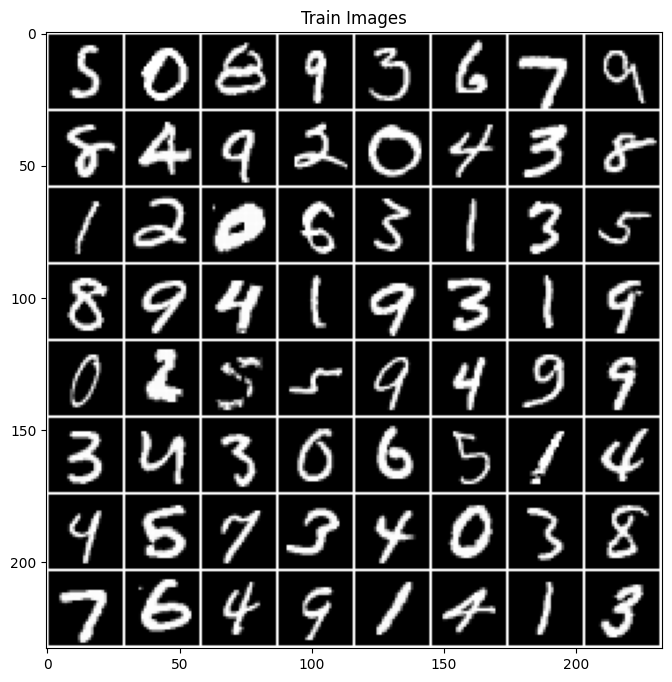

In [124]:
plt.figure(figsize=(8,8))
plt.title("Train Images")
plt.imshow(np.transpose((make_grid(images[:64],
                          padding=1,
                          pad_value=1.0,
                          normalize=True)),
                          (1,2,0)))

## **MLP**

In [125]:
class MLP(torch.nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()

    self.layers = torch.nn.Sequential(
        torch.nn.Linear(input_size, 16),
        torch.nn.ReLU(),

        torch.nn.Linear(16, 32),
        torch.nn.ReLU(),

        torch.nn.Linear(32, 16),
        torch.nn.ReLU(),

        torch.nn.Linear(16, output_size)
    )

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    return self.layers(x)

In [126]:
torch.manual_seed(27)

In [127]:
height, width = images.shape[2:]

In [128]:
input_size = height * width

In [134]:
model = MLP(input_size=input_size, output_size=10)

In [135]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.3)

## **Training**

In [136]:
def accuracy(model, dataloader):
  model = model.eval()

  accuracy = 0.0
  total = 0

  for x, y in dataloader:

    with torch.inference_mode():
      z = model(x)

    labels = torch.argmax(z, dim=1)
    labels = labels.view(y.shape).to(y.dtype)

    results = labels == y
    accuracy += torch.sum(results).item()
    total += len(results)

  return accuracy / total

In [137]:
epochs = 10

In [138]:
for epoch in range(epochs):
  model = model.train()

  for index, (x, y) in enumerate(train_dataloader):
    z = model(x)
    loss = F.cross_entropy(z, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if index % 200 == 0:
      print(f'Epoch: {epoch+1:03d}/{epochs:03d} | Batch: {index+1:03d}/{len(train_dataloader):03d} | Loss: {loss: .3f}')

  print(f'Train Accuracy: {accuracy(model, train_dataloader)*100:.2f}% | Val Accuracy: {accuracy(model, val_dataloader)*100:.2f}%')

Epoch: 001/010 | Batch: 001/844 | Loss:  2.296
Epoch: 001/010 | Batch: 201/844 | Loss:  0.509
Epoch: 001/010 | Batch: 401/844 | Loss:  0.217
Epoch: 001/010 | Batch: 601/844 | Loss:  0.330
Epoch: 001/010 | Batch: 801/844 | Loss:  0.433
Train Accuracy: 92.24% | Val Accuracy: 91.93%
Epoch: 002/010 | Batch: 001/844 | Loss:  0.482
Epoch: 002/010 | Batch: 201/844 | Loss:  0.485
Epoch: 002/010 | Batch: 401/844 | Loss:  0.322
Epoch: 002/010 | Batch: 601/844 | Loss:  0.185
Epoch: 002/010 | Batch: 801/844 | Loss:  0.179
Train Accuracy: 93.96% | Val Accuracy: 93.10%
Epoch: 003/010 | Batch: 001/844 | Loss:  0.264
Epoch: 003/010 | Batch: 201/844 | Loss:  0.110
Epoch: 003/010 | Batch: 401/844 | Loss:  0.416
Epoch: 003/010 | Batch: 601/844 | Loss:  0.177
Epoch: 003/010 | Batch: 801/844 | Loss:  0.242
Train Accuracy: 94.96% | Val Accuracy: 93.97%
Epoch: 004/010 | Batch: 001/844 | Loss:  0.257
Epoch: 004/010 | Batch: 201/844 | Loss:  0.113
Epoch: 004/010 | Batch: 401/844 | Loss:  0.201
Epoch: 004/010 |

## **Evaluating the Results**

In [142]:
print(f"Test accuracy: {accuracy(model, test_dataloader)*100:.2f}%")

Test accuracy: 95.21%
